In [1]:
import pandas as pd           
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Explanation:

pandas is imported as pd, which is a powerful data manipulation library. It provides data structures and functions to efficiently manipulate large datasets.

warnings is imported to suppress any warnings generated during the execution of the code.

numpy is imported as np, which is a fundamental package for numerical computing with Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

matplotlib.pyplot is imported as plt, which is a plotting library for Python. It provides a MATLAB-like interface for creating static, interactive, and animated visualizations.

seaborn is imported as sns, which is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
df=pd.read_csv('LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


This code reads a CSV file named 'LoanApprovalPrediction.csv' into a Pandas DataFrame named df, which represents tabular data. The DataFrame df contains the data from the CSV file and will allow for further data manipulation and analysis using Pandas functions.

In [3]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598,598,586.000000,598,598,598.000000,598.000000,577.000000,584.000000,549.000000,598,598
unique,598,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,388,NaN,465,488,NaN,NaN,NaN,NaN,NaN,225,411
mean,NaN,NaN,NaN,0.755973,NaN,NaN,5292.252508,1631.499866,144.968804,341.917808,0.843352,NaN,NaN
std,NaN,NaN,NaN,1.007751,NaN,NaN,5807.265364,2953.315785,82.704182,65.205994,0.363800,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3806.000000,1211.500000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.750000,NaN,NaN,5746.000000,2324.000000,167.000000,360.000000,1.000000,NaN,NaN


The describe() function in Pandas provides summary statistics for numerical columns in the DataFrame df, including count, mean, standard deviation, minimum, maximum, and quartile values. Specifying include='all' extends this summary to include statistics for categorical columns as well, such as frequency, unique values, and the top value.

In [4]:
df.Married.replace(['No','Yes'],[0,1],inplace=True)

In [5]:
df.Gender.replace(['Male','Female'],[0,1],inplace=True)

In [6]:
df.Dependents.replace(['0.0','1.0','2.0','3.0'],[0,1,2,3],inplace=True)

In [7]:
df.Education.replace(['Not Graduate','Graduate'],[0,1],inplace=True)

In [8]:
df.Self_Employed.replace(['No','Yes'],[0,1],inplace=True)

In [9]:
df.Property_Area.replace(['Rural','Semiurban','Urban'],[0,1,2],inplace=True)

In [10]:
df.Loan_Status.replace(['N','Y'],[0,1],inplace=True)

This code replaces categorical values in specific columns of the DataFrame df with numerical equivalents, facilitating machine learning model training. For example, 'No' and 'Yes' in the 'Married' column are replaced with 0 and 1, respectively. Similarly, 'Male' and 'Female' in the 'Gender' column are replaced with 0 and 1, and so on for other columns like 'Dependents', 'Education', 'Self_Employed', 'Property_Area', and 'Loan_Status'. This transformation converts categorical data into a format suitable for numerical analysis and modeling.

In [11]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

This code outputs the data types of each column in the DataFrame df, indicating whether each column contains numerical (int64 or float64) or categorical (object) data

###### Null values count

In [12]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64


This code checks for missing values in each column of the DataFrame df and sums up the count of missing values for each column

#### Visualising Null values using heatmap

<AxesSubplot:>

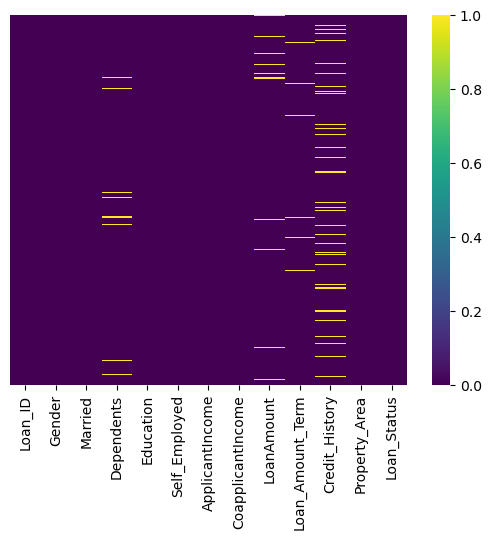

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

This code creates a heatmap visualization using Seaborn (sns) to display the presence of missing values in the DataFrame df.

##### Handling Null Values

<AxesSubplot:>

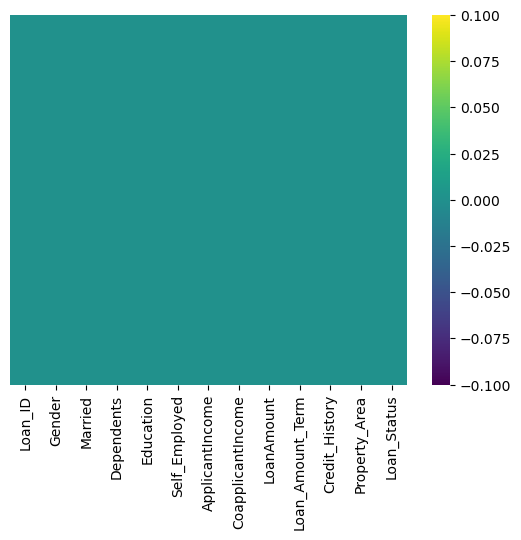

In [14]:
df.Dependents.fillna(0,inplace=True)
df.Credit_History.fillna(0,inplace=True)
df.LoanAmount.fillna(0,inplace=True)
df.Loan_Amount_Term.fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')


This code fills missing values in specific columns (Dependents, Credit_History, LoanAmount, Loan_Amount_Term) with zeros using the fillna() method, modifying the DataFrame df in place. Then, it creates a heatmap using Seaborn (sns) to visualize any remaining missing values in the DataFrame after filling. The heatmap has no y-axis tick labels (yticklabels=False), includes a color bar (cbar=True) to indicate the intensity of missingness, and uses the 'viridis' color map (cmap='viridis') for visualization.

#### Checkinf correlation of every attribute with our target attribute "Loan  status"

In [15]:
f=df.columns[2:-1]
print('Correlation of every attribute with our target attribute "Loan  status":\n')
for i in f:
    corr=df[i].corr(df['Loan_Status'])
    print(i,':',corr)

Correlation of every attribute with our target attribute "Loan  status":

Married : 0.09318283276554319
Dependents : 0.009104850848783944
Education : 0.08161742785624296
Self_Employed : -0.005604727897362878
ApplicantIncome : -0.02524841707927245
CoapplicantIncome : -0.05819401309935648
LoanAmount : -0.024436160603578186
Loan_Amount_Term : 0.010734998842105227
Credit_History : 0.42953081770008766
Property_Area : 0.028315392950963365



This code calculates the correlation between each attribute (excluding the first two columns and the last column) in the DataFrame df and the target attribute 'Loan_Status'. It iterates through the selected columns (f), calculates the correlation using the corr() method, and prints the correlation coefficient for each attribute with respect to the target attribute 'Loan_Status'.

#### Checking for outliers

<AxesSubplot:ylabel='LoanAmount'>

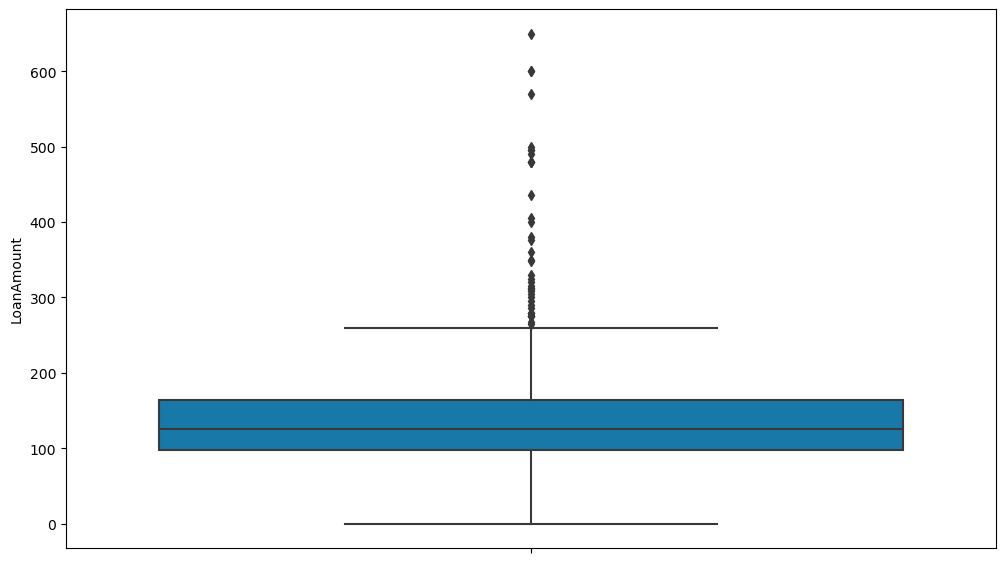

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='LoanAmount',  data = df, palette = 'winter')


This code creates a boxplot using Seaborn (sns) to visualize the distribution of the 'LoanAmount' column in the DataFrame df, aiming to identify any outliers. The boxplot provides information about the median, quartiles, and potential outliers in the data. The figure size is adjusted to 12x7 using plt.figure(figsize=(12,7)), and the color palette 'winter' is applied to the boxplot for aesthetic representation.

<AxesSubplot:ylabel='ApplicantIncome'>

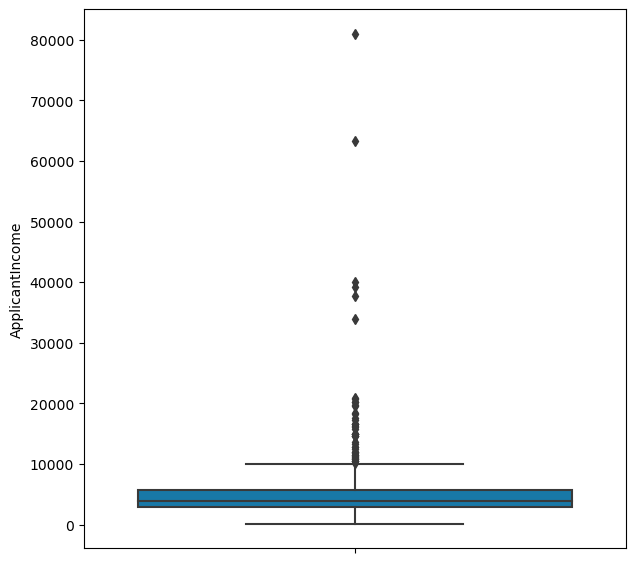

In [17]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='ApplicantIncome',  data = df, palette = 'winter')


This code creates a boxplot using Seaborn (sns) to visualize the distribution of the 'ApplicantIncome' column in the DataFrame df, aiming to identify any outliers. The boxplot provides information about the median, quartiles, and potential outliers in the data. The figure size is adjusted to 7x7 using plt.figure(figsize=(7,7)), and the color palette 'winter' is applied to the boxplot for aesthetic representation

<AxesSubplot:ylabel='CoapplicantIncome'>

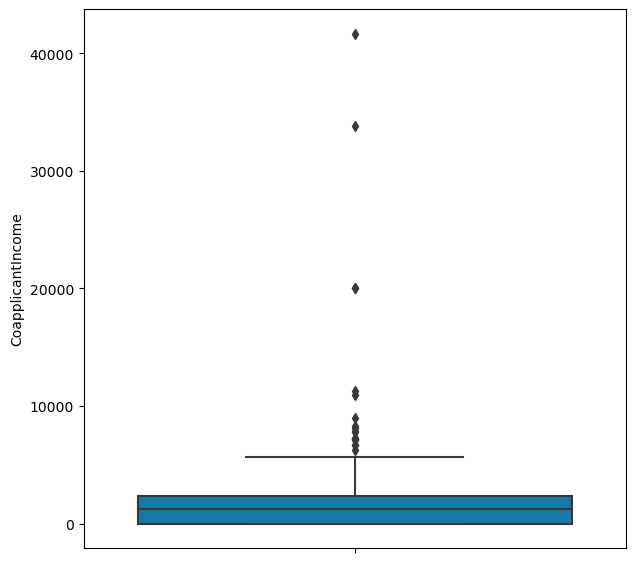

In [18]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='CoapplicantIncome',  data = df, palette = 'winter')

In [19]:
mad=1.4826*np.median(np.abs(df.ApplicantIncome-df.ApplicantIncome.median()))
size_outlr_mad=df.ApplicantIncome
size_outlr_mad[((df.ApplicantIncome-df.ApplicantIncome.median()).abs()>3*mad)]=df.ApplicantIncome.median() 
print("Applicant Income MAD:\n", size_outlr_mad.median())

#Handling 'Coapplicant Income column
mad=1.4826*np.median(np.abs(df.CoapplicantIncome-df.CoapplicantIncome.median()))
size_outlr_mad=df.CoapplicantIncome
size_outlr_mad[((df.CoapplicantIncome-df.CoapplicantIncome.median()).abs()>3*mad)]=df.CoapplicantIncome.median()
print("Coapplicant Income MAD:\n",size_outlr_mad.median())

# Handling 'LoanAmount' column
mad=1.4826*np.median(np.abs(df.LoanAmount-df.LoanAmount.median()))
size_outlr_mad=df.LoanAmount
size_outlr_mad[((df.LoanAmount-df.LoanAmount.median()).abs()>3*mad)]=df.LoanAmount.median()
print("LoanAmount MAD:\n",size_outlr_mad.median())

Applicant Income MAD:
 3803.0
Coapplicant Income MAD:
 1210.75
LoanAmount MAD:
 125.0



This code calculates the Median Absolute Deviation (MAD) for identifying outliers in the 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount' columns. It then replaces the outliers with the median value of each respective column. Finally, it prints the median after handling outliers for each column.

The MAD method is robust to outliers and calculates the median absolute deviation from the median. Outliers beyond a certain threshold (usually 3 times MAD) are replaced with the median value of the respective column. This helps in mitigating the influence of outliers on statistical analysis.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

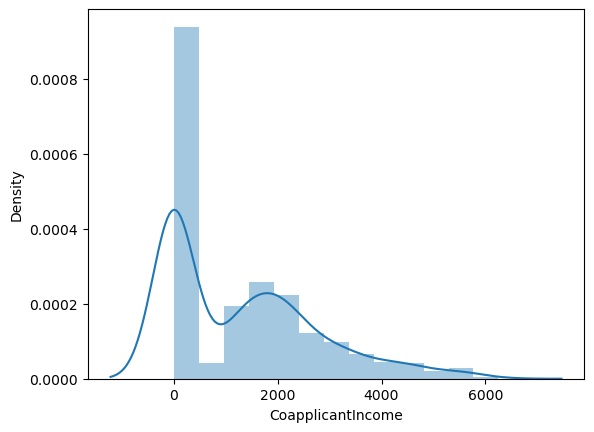

In [20]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

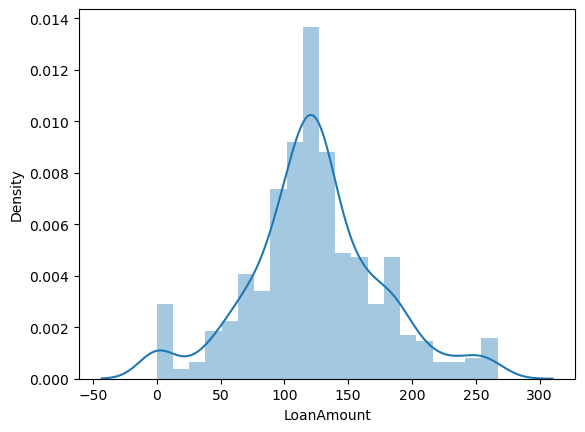

In [21]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

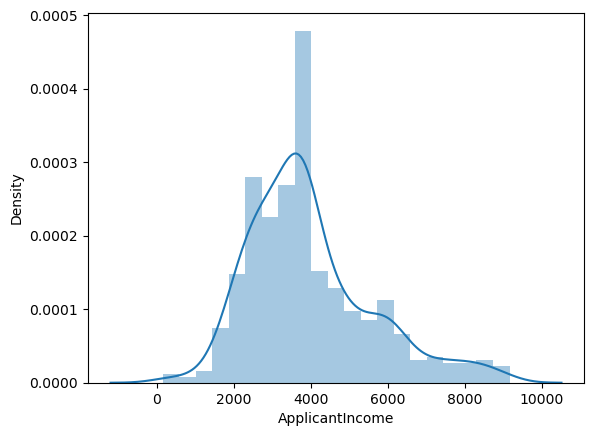

In [22]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

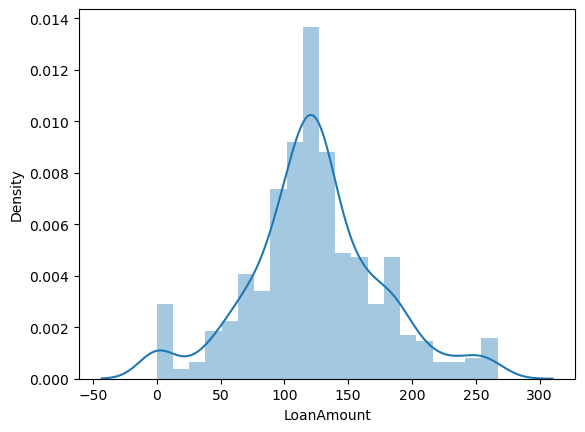

In [23]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

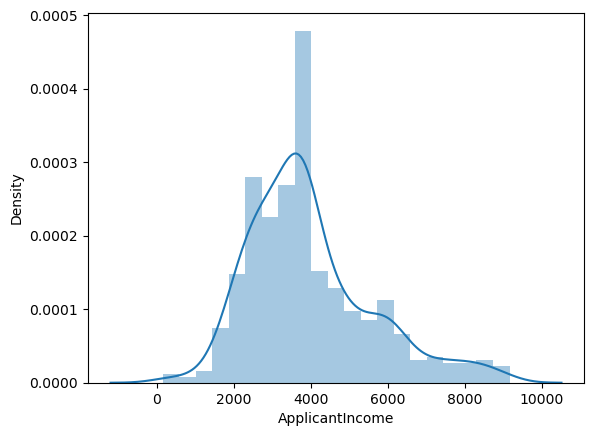

In [24]:
sns.distplot(df['ApplicantIncome'])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

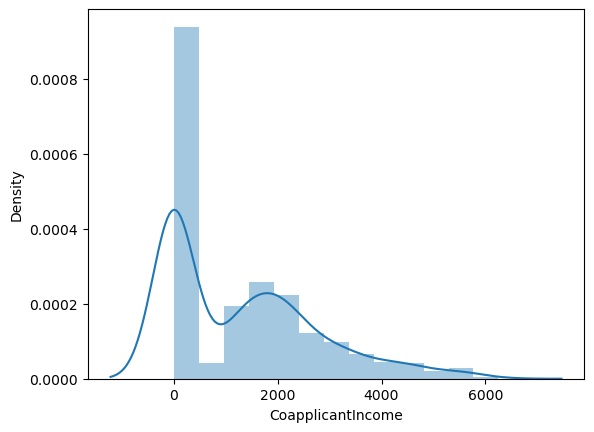

In [25]:
sns.distplot(df['CoapplicantIncome'])


This code uses Seaborn's distplot() function to create histograms for the distributions of 'CoapplicantIncome', 'LoanAmount', and 'ApplicantIncome' columns from the DataFrame df. Each histogram represents the frequency distribution of values within each column, providing insight into the underlying data distribution. The plt.legend() function adds a legend to the plot, allowing for easy identification of each distribution.

<AxesSubplot:ylabel='LoanAmount'>

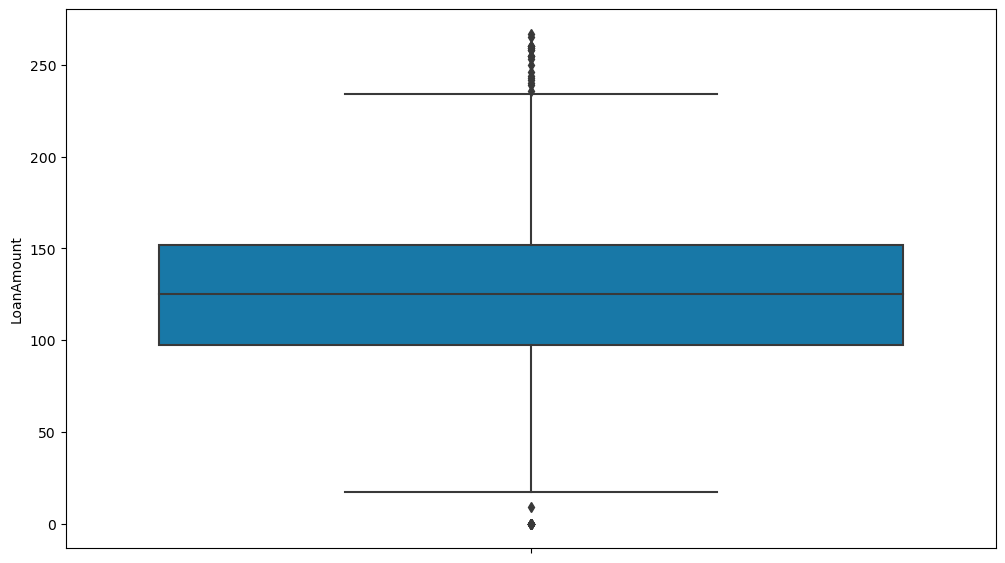

In [26]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='LoanAmount',  data = df, palette = 'winter')

<AxesSubplot:ylabel='ApplicantIncome'>

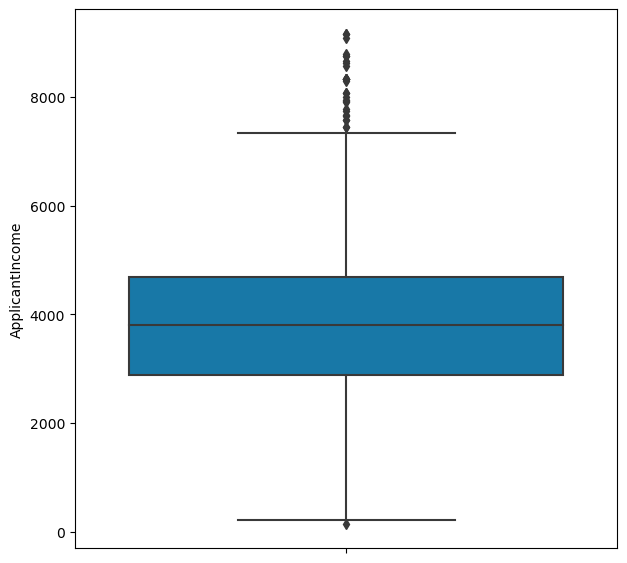

In [27]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='ApplicantIncome',  data = df, palette = 'winter')

<AxesSubplot:ylabel='CoapplicantIncome'>

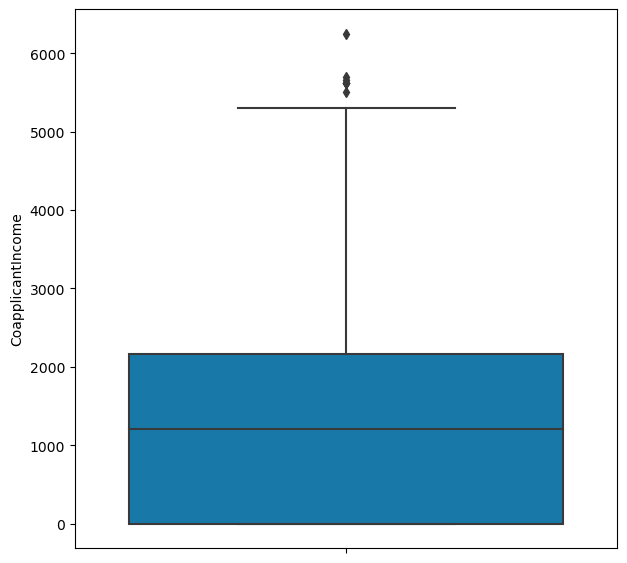

In [28]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='CoapplicantIncome',  data = df, palette = 'winter')

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

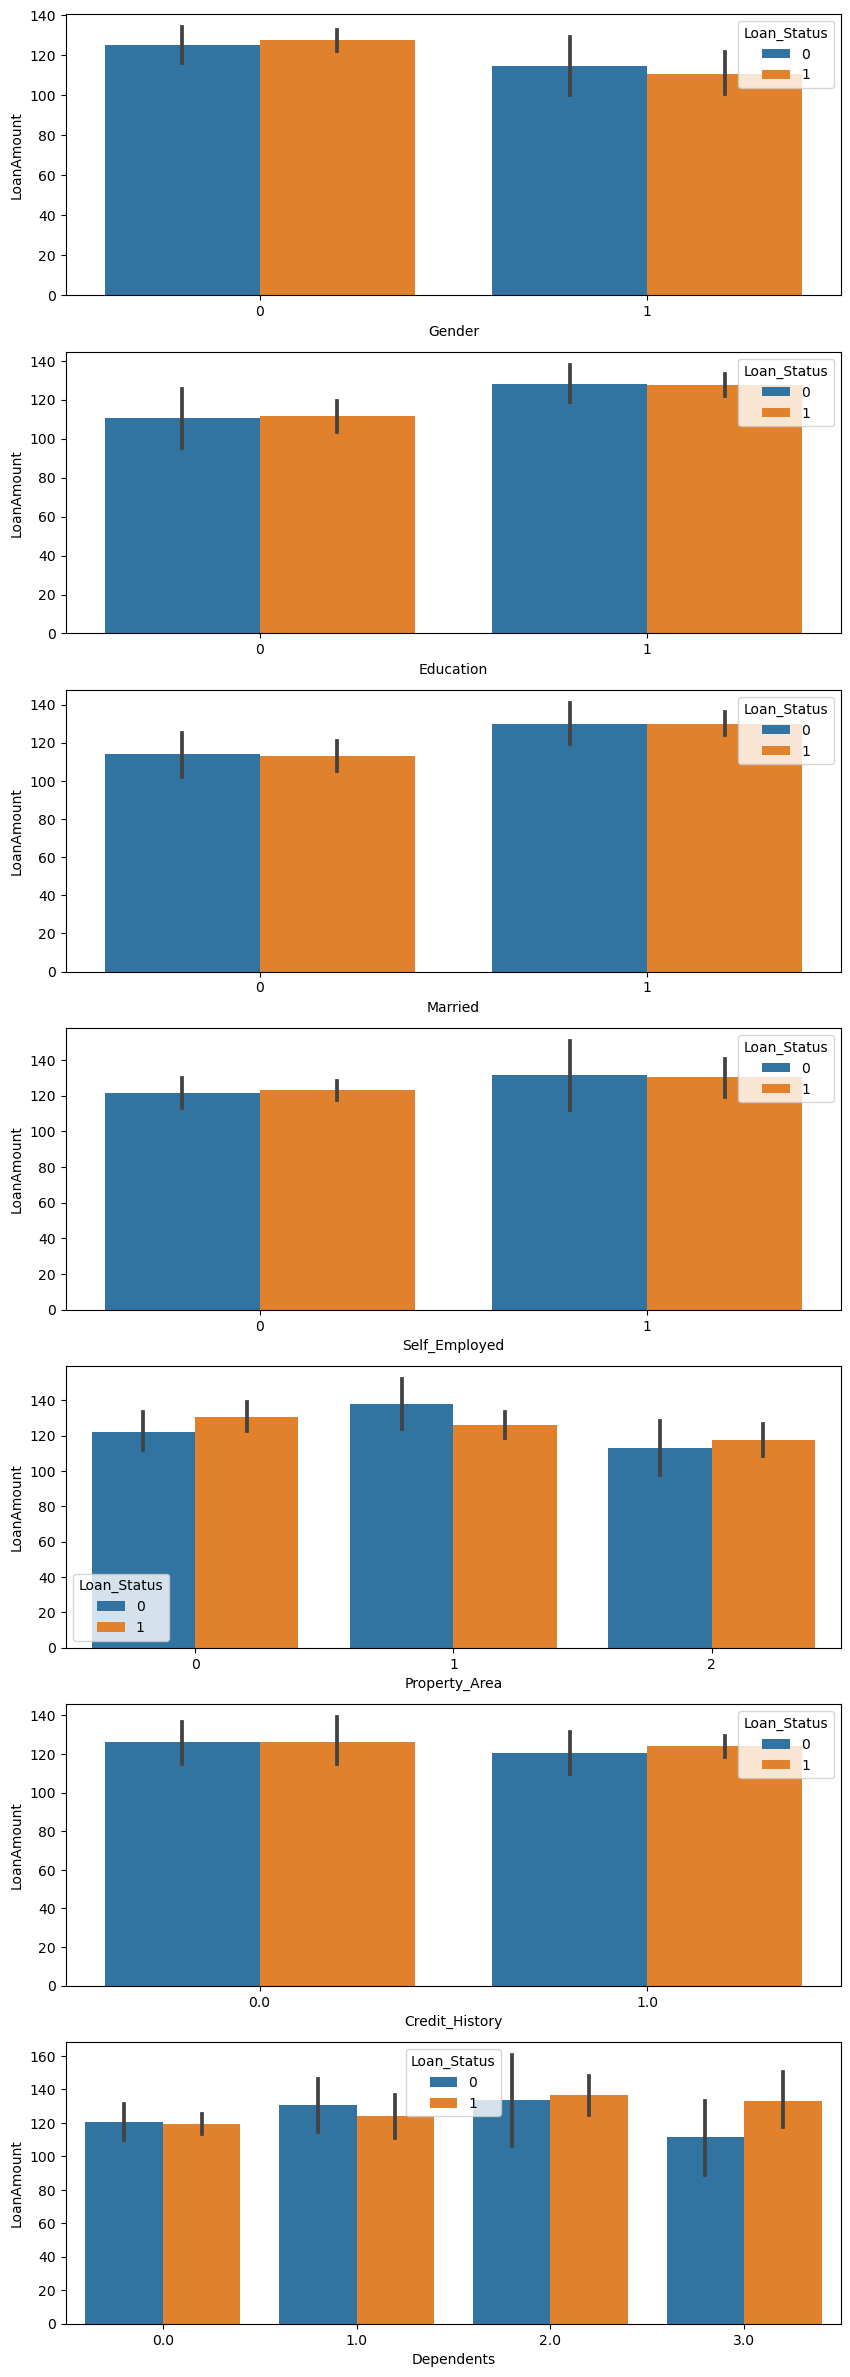

In [29]:
f, axes = plt.subplots(7, 1, figsize=(10, 30)) 
sns.barplot(x = df.Gender, y = df.LoanAmount, hue = df.Loan_Status, ax = axes[0])
sns.barplot(x = df.Education, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[1])
sns.barplot(x = df.Married, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[2])
sns.barplot(x = df.Self_Employed, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[3])
sns.barplot(x = df.Property_Area, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[4])
sns.barplot(x = df.Credit_History, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[5])
sns.barplot(x = df.Dependents, y = df.LoanAmount, hue = df.Loan_Status, ax = axes[6])


This code creates a set of subplots arranged in a vertical layout, each representing a bar plot using Seaborn's barplot() function. Each bar plot displays the relationship between a specific categorical variable (such as 'Gender', 'Education', 'Married', 'Self_Employed', 'Property_Area', 'Credit_History', and 'Dependents') and the 'LoanAmount' column. The hue parameter is used to differentiate loan status categories ('Loan_Status'). These visualizations help understand how each categorical variable influences loan amount and loan approval status.

## Model Training:

Using machine learning for loan status prediction involves training a computer model to analyze past loan application data and predict whether future loan applications will be approved or not. This process starts with collecting historical data on loan applications, including various factors such as income, education level, marital status, and the outcome of each application (approved or denied). This data is then used to train the machine learning model, where the model learns patterns and relationships between the input features and the loan approval status

### Random Forest Classifer


RandomForestClassifier is an ensemble learning method that constructs multiple decision trees during training. Each tree is trained on a random subset of the dataset and features, reducing overfitting. Predictions are made by aggregating the outputs of individual trees through majority voting. This algorithm is robust, scalable, and effective for classification tasks across various domains. Parameter tuning can further optimize its performance for specific applications.

In [30]:
from sklearn.ensemble import RandomForestClassifier


This line of code imports the RandomForestClassifier class from the scikit-learn library, enabling the use of the RandomForestClassifier algorithm for classification tasks in Python.

In [31]:
df['is_train']=np.random.uniform(0,1,len(df))<=0.75
train,test=df[df['is_train']==True],df[df['is_train']==False]
print("No of training dataframes:",len(train))
print("No of testing dataframes:",len(test))

No of training dataframes: 467
No of testing dataframes: 131


This code randomly assigns rows from the DataFrame df to either the training set or the testing set based on a given probability threshold (in this case, 0.75).

Rows with a randomly generated number less than or equal to 0.75 are assigned to the training set (train), while the remaining rows are assigned to the testing set (test).
The number of rows in each set is printed to verify the split.

In [32]:
f=df.columns[1:12]
print(f)
y=train['Loan_Status']
cif=RandomForestClassifier(n_jobs=2,n_estimators=100,random_state=0,verbose=1)
print(cif)
cif.fit(train[f],y)
preds=cif.predict(test[f])
print(preds)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
RandomForestClassifier(n_jobs=2, random_state=0, verbose=1)
[0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished



In this code snippet, a set of columns from the DataFrame df (excluding the first column) is selected as features for training the RandomForestClassifier model. These selected features are stored in the variable f. Additionally, the target variable 'Loan_Status' is extracted from the training set train and stored in the variable y.

A RandomForestClassifier model is then initialized with specific parameters, including the number of jobs to run in parallel (n_jobs=2), the number of trees in the forest (n_estimators=100), and a random state for reproducibility (random_state=0). The verbose=1 parameter is set to print progress messages during training.

Next, the model is trained on the training data using the fit() method, with features (train[f]) and the target variable (y) as inputs. Subsequently, predictions are generated on the testing data (test[f]) using the trained model, and the results are stored in the variable preds. This process sets the stage for evaluating the model's performance and making predictions on unseen data.

In [33]:
pd.crosstab(test['Loan_Status'],preds,rownames=['Actual Loan_Status'],colnames=['Predicted Loan_Status'])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,19,22
1,13,77


The code utilizes the pd.crosstab() function to create a contingency table that showcases the relationship between the actual loan status, extracted from the testing dataset (test['Loan_Status']), and the predicted loan status (preds) generated by the RandomForestClassifier model. This table enables a clear comparison between the actual and predicted loan statuses, aiding in the assessment of the model's accuracy. The rownames=['Actual Loan_Status'] and colnames=['Predicted Loan_Status'] parameters are used to label the rows and columns of the resulting table, respectively, providing clarity in interpreting the cross-tabulation. Through this analysis, the model's performance in correctly predicting loan statuses can be evaluated, helping stakeholders make informed decisions regarding loan approvals.

In [34]:
z=test['Loan_Status']
cif.score(test[f],z)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


0.732824427480916

This code calculates the accuracy of the RandomForestClassifier model on the testing dataset (test) using the score() method. The features used for prediction are provided as the first argument (test[f]), and the actual loan statuses from the testing dataset are provided as the second argument (z).

The score() method computes the accuracy of the model by comparing its predictions with the actual loan statuses. It returns the proportion of correct predictions out of the total number of predictions made. This accuracy score provides insight into how well the model generalizes to unseen data and can be used to evaluate its performance.

In [35]:
list(zip(train[f],cif.feature_importances_))

[('Gender', 0.027450835923385705),
 ('Married', 0.029618978749475642),
 ('Dependents', 0.057203622298340175),
 ('Education', 0.028188623428191995),
 ('Self_Employed', 0.025527179439174378),
 ('ApplicantIncome', 0.21502379055208873),
 ('CoapplicantIncome', 0.1267061604422562),
 ('LoanAmount', 0.19844730637457006),
 ('Loan_Amount_Term', 0.055870868940958454),
 ('Credit_History', 0.17447291893412828),
 ('Property_Area', 0.06148971491743043)]


This code creates a list of tuples using the zip() function, where each tuple contains a feature from the training data train[f] and its corresponding importance score obtained from the trained RandomForestClassifier model cif.feature_importances_.

train[f] represents the features used for training the model.
cif.feature_importances_ provides the importance scores assigned to each feature by the RandomForestClassifier model.

In [36]:
final_Dataset=df.copy()
final_Dataset=final_Dataset.drop(['Loan_ID','Education','Gender','Married',\
                                 'Dependents','Self_Employed','Loan_Amount_Term','is_train'],axis=1)
final_Dataset.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,3960.060201,1296.585987,124.030100,0.774247,1.038462,0.687291
std,1616.192898,1450.670673,51.643175,0.418427,0.789499,0.463985
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,97.250000,1.000000,0.000000,0.000000
50%,3803.000000,1210.750000,125.000000,1.000000,1.000000,1.000000
75%,4691.750000,2166.750000,152.000000,1.000000,2.000000,1.000000
max,9167.000000,6250.000000,267.000000,1.000000,2.000000,1.000000


This code creates a new DataFrame final_Dataset by copying the original DataFrame df. It then removes several columns, including 'Loan_ID', 'Education', 'Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', and 'is_train', using the drop() method along the specified axis.

In [37]:
final_Dataset.to_csv(r'finalTrain.csv',index=None,header=True)

In [38]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, classification_report

his code imports several modules and functions from the scikit-learn library:

model_selection module: Provides tools for model selection and evaluation, such as cross-validation.
train_test_split function: Splits datasets into random train and test subsets for model evaluation.
cross_val_score function: Computes cross-validated scores for an estimator using cross-validation techniques.
roc_curve function: Computes Receiver Operating Characteristic (ROC) curve.
roc_auc_score function: Computes the Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
auc function: Computes the Area Under the Curve (AUC) from prediction scores.
mean_squared_error function: Computes the mean squared error regression loss between actual and predicted values.
accuracy_score function: Computes the accuracy classification score.
classification_report function: Builds a text report showing the main classification metrics.

In [39]:
final_Dataset["is_train"] = np.random.uniform (0, 1, len (final_Dataset)) <= 0.75 
train, test=final_Dataset[final_Dataset["is_train"]==True], final_Dataset[final_Dataset["is_train"]==False] 
print("no. of observations for the training dataframes:", len(train)) 
print("no. of observations for the test dataframes:",len(test)) 
f =final_Dataset.columns[:-2] 
print(f)

no. of observations for the training dataframes: 443
no. of observations for the test dataframes: 155
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')



This code randomly assigns observations from the final_Dataset DataFrame to either the training set or the testing set based on a given probability threshold (0.75).

A new column "is_train" is added to final_Dataset, where each observation is assigned a random number between 0 and 1. If the random number is less than or equal to 0.75, the observation is marked as part of the training set.
The observations marked as training data are stored in the train DataFrame, while the remaining observations are stored in the test DataFrame.
The number of observations in each set is printed to verify the split.
The variable f is assigned the column names of final_Dataset, excluding the last two columns ("Loan_Status" and "is_train").

### KNN classifier

K-Nearest Neighbors (KNN) is a straightforward supervised learning algorithm used for classification tasks. During training, KNN memorizes the feature vectors and corresponding class labels of the training data. When predicting the class label of a new data point, KNN calculates the distance between the new point and all other points in the training data, typically using the Euclidean distance metric. The algorithm then selects the K nearest neighbors and assigns the class label of the majority among them to the new data point. The choice of K is a crucial hyperparameter that affects the model's performance and computational complexity. Evaluating the KNN classifier involves assessing its accuracy, precision, recall, F1-score, and ROC-AUC score to determine its effectiveness in handling unseen data and making reliable predictions. While KNN is intuitive and suitable for various classification tasks, it may face challenges with computational complexity in large datasets and high-dimensional spaces.







In [40]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


This code imports several modules and classes from scikit-learn:

neighbors module: Contains various classes related to nearest neighbors algorithms.
KNeighborsClassifier class: Implements the K-nearest neighbors classifier algorithm for classification tasks.
Pipeline class: Constructs a pipeline for chaining multiple estimators.
GridSearchCV class: Performs an exhaustive search over a specified parameter grid to find the best parameters for the estimator using cross-validated performance.

In [41]:
y = final_Dataset["Loan_Status"]
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", n_jobs=-1).fit(final_Dataset[f], y)
pipe = Pipeline([("knn", knn)])
search_space = [{"knn__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]}]
clf = GridSearchCV(pipe, search_space, cv=2, verbose=1).fit(final_Dataset[f], y)
k = clf.best_estimator_.get_params()["knn__n_neighbors"]
print("k =", k)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
k = 9


This code trains a K-nearest neighbors (KNN) classifier on the features and target variable from the `final_Dataset`. Initially, a KNeighborsClassifier is initialized with specific parameters: `n_neighbors=5`, indicating the number of neighbors to consider, `metric="euclidean"`, specifying the distance metric as Euclidean distance, and `n_jobs=-1`, enabling parallel computation across all available CPU cores. Subsequently, a pipeline is constructed to encapsulate the KNN classifier. A grid search is then conducted using GridSearchCV to tune the hyperparameter `n_neighbors` over a predefined range. The search space comprises values ranging from 2 to 9. The grid search performs cross-validation with 2 folds and prints verbose progress messages. Finally, the best value of `n_neighbors` is extracted from the best estimator obtained through grid search, and it is printed out for further analysis. This iterative process optimizes the KNN classifier by identifying the most suitable value of `n_neighbors` that maximizes predictive performance on the dataset.

In [42]:
X = train[f][["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History", "Property_Area"]].values
y = np.array(train["Loan_Status"])
KNNmodel = neighbors.KNeighborsClassifier(k, weights="uniform")
KNNmodel.fit(X, y)
preds = KNNmodel.predict(test[f])
acc_knn = KNNmodel.score(test[f], test["Loan_Status"])
print(acc_knn)

0.5806451612903226


This code segment constructs a K-nearest neighbors (KNN) classifier using the optimal value of `k` determined from the previous grid search. Initially, it defines the feature matrix `X` and target array `y` from the training dataset, where `X` includes selected features such as 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', and 'Property_Area', and `y` contains the corresponding class labels ('Loan_Status'). Subsequently, a KNN classifier (`KNeighborsClassifier`) is instantiated with the optimal `k` value and uniform weights. The model is then trained on the training data using the `fit()` method. Predictions are generated for the testing dataset using the `predict()` method, and the accuracy of the KNN model on the testing data is evaluated using the `score()` method. Finally, the accuracy score is printed to assess the performance of the KNN classifier in predicting loan statuses on unseen data. This process aims to optimize the KNN model's hyperparameters and evaluate its effectiveness in making accurate predictions.

In [43]:
pd.crosstab(test['Loan_Status'],preds,rownames=['Actual Loan_Status'],colnames=['Predicted Loan_status'])

Predicted Loan_status,0,1
Actual Loan_Status,,
0,6,51
1,14,84


This code generates a cross-tabulation (contingency table) between the actual loan statuses from the testing dataset (`test['Loan_Status']`) and the predicted loan statuses (`preds`) obtained from the K-nearest neighbors (KNN) classifier.

- `pd.crosstab()` is a Pandas function used to compute a simple cross-tabulation of two (or more) factors.
- `test['Loan_Status']` represents the actual loan statuses from the testing dataset.
- `preds` represents the predicted loan statuses generated by the KNN classifier.
- `rownames=['Actual Loan_Status']` and `colnames=['Predicted Loan_status']` are used to specify row and column names in the resulting cross-tabulation table, respectively, providing clarity in interpreting the table.

The resulting table provides insights into how well the KNN classifier predicts loan statuses by showing the count of correct and incorrect predictions for each class label.

Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

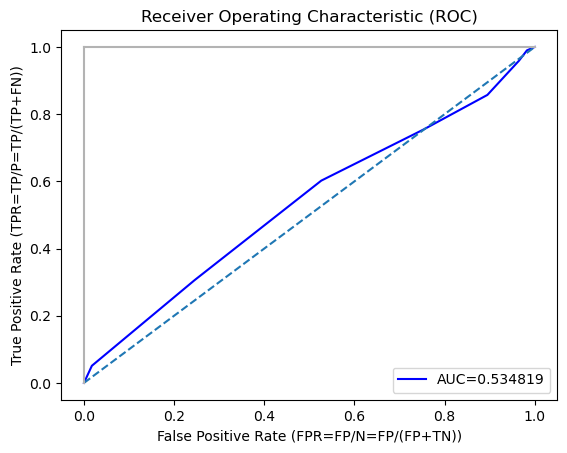

In [44]:
y_score = KNNmodel.predict_proba (test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve (test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)') 
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label="AUC=%f"%roc_auc)
plt.legend (loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c="0.7")
plt.plot([1, 1], c="0.7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))') 
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')


This code segment calculates the Receiver Operating Characteristic (ROC) curve and the corresponding Area Under the Curve (AUC) for evaluating the performance of the K-nearest neighbors (KNN) classifier on the testing dataset. Initially, it predicts the probabilities of the positive class using the `predict_proba()` method of the KNN model on the testing features. Subsequently, the False Positive Rate (FPR), True Positive Rate (TPR), and associated thresholds are computed using the `roc_curve()` function. These values are then plotted to visualize the ROC curve using Matplotlib. The plot includes the AUC value as a label in the legend and a dashed line representing the diagonal line (random classifier). Additionally, vertical lines at FPR=0 and FPR=1 mark the extremes of the ROC space. The y-axis is labeled as "True Positive Rate" and the x-axis as "False Positive Rate", aiding in interpreting the performance of the KNN classifier. This visualization offers insights into the trade-off between true positive and false positive rates at different classification thresholds, with a higher AUC indicating better discriminative ability of the classifier.

In [45]:
print(cross_val_score(KNNmodel, final_Dataset [f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))

[0.92771084 0.85365854 0.91463415 0.86585366 0.8902439 ]


This code segment employs cross-validation to assess the performance of the K-nearest neighbors (KNN) classifier. It calculates recall scores for each fold of a 5-fold cross-validation using the cross_val_score() function from scikit-learn.

During cross-validation, the dataset is divided into five subsets, or "folds," with each fold serving once as the validation set while the remaining folds are used for training. The KNN classifier (KNNmodel) is trained and evaluated on each fold, and the recall score is computed as the evaluation metric. Recall measures the proportion of actual positive cases that were correctly identified by the classifier.

By specifying scoring="recall", the cross_val_score() function ensures that it computes recall scores for each fold. The resulting array of recall scores is then printed, providing insights into the consistency and performance of the KNN classifier across different subsets of the dataset. This analysis aids in understanding how well the classifier generalizes to unseen data and accurately identifies positive class instances.

In [46]:
print(cross_val_score(KNNmodel, final_Dataset [f], final_Dataset ["Loan_Status"], cv=5, scoring="precision"))

[0.7        0.72164948 0.69444444 0.67619048 0.70192308]


In [47]:
print("Accuracy of k-NN classifier: ", acc_knn) 

Accuracy of k-NN classifier:  0.5806451612903226


In [48]:
print(classification_report(test["Loan_Status"], preds))

              precision    recall  f1-score   support

           0       0.30      0.11      0.16        57
           1       0.62      0.86      0.72        98

    accuracy                           0.58       155
   macro avg       0.46      0.48      0.44       155
weighted avg       0.50      0.58      0.51       155



The classification_report() function from scikit-learn generates a comprehensive report containing various evaluation metrics for a classification model's performance. Here's a breakdown of what this code snippet does:

test["Loan_Status"]: This represents the actual class labels (ground truth) from the testing dataset.

preds: This represents the predicted class labels obtained from the K-nearest neighbors (KNN) classifier.

The classification_report() function compares the actual class labels (test["Loan_Status"]) with the predicted class labels (preds) and computes several metrics, including precision, recall, F1-score, and support, for each class (in this case, "Y" and "N" representing loan approval status).

Precision: The proportion of true positive predictions among all positive predictions made by the model.
Recall: The proportion of true positive predictions among all actual positive instances in the dataset.
F1-score: The harmonic mean of precision and recall, providing a balanced measure of a classifier's performance.
Support: The number of occurrences of each class in the testing dataset.
The classification_report() function prints out these metrics for each class separately, as well as their average (weighted average by default) across all classes. This report helps in understanding the overall performance of the KNN classifier in terms of its ability to correctly classify loan approval statuses, providing insights into its precision, recall, and overall effectiveness.

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

This code imports the `DecisionTreeClassifier` class from the scikit-learn library. The Decision Tree classifier is a popular supervised learning algorithm used for classification tasks. Here's a brief overview of its functionality:

- Decision trees are versatile machine learning models that can perform both classification and regression tasks.
- They work by recursively partitioning the feature space into regions, where each region corresponds to a leaf node in the tree.
- At each internal node of the tree, a decision is made based on the value of a feature, leading to the partitioning of the data into subsets.
- The goal is to create a tree that accurately predicts the target variable by making decisions that maximize information gain or minimize impurity at each split.
- Decision trees are prone to overfitting, especially with deep trees, but techniques like pruning and setting maximum depth can help mitigate this issue.

By importing the `DecisionTreeClassifier` class, you can instantiate and train decision tree models for classification tasks, leveraging their ability to capture complex decision boundaries and interpretability.

In [50]:
Decision_Tree=DecisionTreeClassifier()
Decision_Tree.fit(train[f], train["Loan_Status"])
prediction=Decision_Tree.predict(test[f])
acc_dtree=accuracy_score(test["Loan_Status"], prediction)

This code segment creates a Decision Tree classifier using the default hyperparameters and trains it on the training features (train[f]) and corresponding target labels (train["Loan_Status"]). Then, it generates predictions for the testing features (test[f]) using the trained Decision Tree classifier.

In [51]:
acc_dtree

0.6903225806451613

In [52]:
print("Accuracy: ", Decision_Tree.score (test [f], test["Loan_Status"])) 
print(classification_report(test["Loan_Status"], prediction))

Accuracy:  0.6903225806451613
              precision    recall  f1-score   support

           0       0.59      0.51      0.55        57
           1       0.74      0.80      0.76        98

    accuracy                           0.69       155
   macro avg       0.66      0.65      0.66       155
weighted avg       0.68      0.69      0.68       155



The first `print()` statement assesses the accuracy of the Decision Tree classifier on the testing dataset. It calculates the proportion of correctly classified instances out of the total number of instances in the testing dataset. By invoking the `Decision_Tree.score()` method with the testing features and corresponding target labels as arguments, it computes and displays the accuracy score, offering a single metric to gauge the classifier's overall performance.

The second part of the code employs the `classification_report()` function to generate a detailed report evaluating the Decision Tree classifier's performance. This report encompasses precision, recall, F1-score, and support metrics for each class in the target variable. By comparing the actual class labels from the testing dataset with the predicted class labels obtained from the classifier, it provides a comprehensive analysis of the model's predictive capabilities. This analysis aids in understanding the classifier's strengths and weaknesses in correctly identifying positive and negative instances, facilitating informed decision-making in the evaluation of its performance.

### Logistic Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression

This code snippet imports the `LogisticRegression` class from scikit-learn's linear_model module, enabling the use of logistic regression for binary classification tasks. Logistic regression is a supervised learning algorithm widely used for its simplicity and interpretability. Despite its name, it's employed for binary classification, where the target variable has two possible outcomes. The algorithm models the probability that a given input belongs to a particular class using the logistic function, which maps real-valued numbers to values between 0 and 1. During training, logistic regression learns the relationship between input features and the probability of the positive class, adjusting model parameters to maximize the likelihood of observed data. Once trained, the model can predict the probability of an input belonging to the positive class, aiding in classification. By importing the `LogisticRegression` class, users can instantiate and train logistic regression models efficiently, benefiting from their ease of use and interpretability in binary classification tasks.

In [54]:
LogisticRegressionModel=LogisticRegression (solver='lbfgs')
LogisticRegressionModel.fit(train [f], train["Loan_Status"])
print("The intercept for the model is:", LogisticRegressionModel.intercept_)
print("The coefficients for the model is: ", LogisticRegressionModel.coef_)
predictions=LogisticRegressionModel.predict(test[f])
acc_lr=accuracy_score (test["Loan_Status"], predictions) 

The intercept for the model is: [0.16457697]
The coefficients for the model is:  [[-1.50067853e-04  1.48408958e-05 -1.65374739e-04  1.89523306e+00
  -2.04029040e-02]]


In this code snippet, a logistic regression model is trained and evaluated for predicting loan approval statuses. Initially, the LogisticRegression class is instantiated with the 'lbfgs' solver, which is commonly used for optimization in logistic regression. The model is then trained on the training features (train[f]) and corresponding target labels (train["Loan_Status"]) using the fit() method.

In [55]:
acc_lr

0.7354838709677419

In [56]:
pd.crosstab(test["Loan_Status"], predictions, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,28,29
1,12,86


In [57]:
lin_mse = mean_squared_error(predictions, test["Loan_Status"])
lin_rmse=np.sqrt(lin_mse)
print('Logistic Regression RMSE: %.4f'% lin_rmse)

Logistic Regression RMSE: 0.5143


In [58]:
print ("Prediction: ", predictions)
print('Logistic Regression R squared: %.4f' % LogisticRegressionModel.score (test [f], test["Loan_Status"]))

Prediction:  [1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1]
Logistic Regression R squared: 0.7355


the logistic regression model's predictions for loan approval statuses are printed, showcasing the model's classifications for the testing dataset. This provides visibility into how the model categorizes loan applications as approved or rejected based on the input features.

In [59]:
print("Accuracy: ", LogisticRegressionModel.score (test [f], test["Loan_Status"]))
print(classification_report (test["Loan_Status"], predictions))

Accuracy:  0.7354838709677419
              precision    recall  f1-score   support

           0       0.70      0.49      0.58        57
           1       0.75      0.88      0.81        98

    accuracy                           0.74       155
   macro avg       0.72      0.68      0.69       155
weighted avg       0.73      0.74      0.72       155



In [60]:
print("KNN: ", acc_knn)
print("LR: ", acc_lr) 
print("DTree:", acc_dtree)

KNN:  0.5806451612903226
LR:  0.7354838709677419
DTree: 0.6903225806451613


### Linear Regression Model

Linear regression is a foundational supervised learning algorithm used extensively in predictive modeling and regression analysis. It seeks to establish the relationship between a dependent variable (the target) and one or more independent variables (features) by fitting a linear equation to observed data points. The core objective is to find the best-fitting straight line that describes this relationship. 

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [62]:
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']
target = ['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(model.coef_)

Mean Squared Error: 0.1618164536872054
[[-1.19607526e-05  1.31363416e-05  6.33337649e-06  4.61688822e-01]]


The code segment initializes a linear regression model to predict loan approval status based on selected features. It splits the dataset into training and testing sets, trains the model on the training data, and evaluates its performance using mean squared error. Finally, it prints the coefficients representing the features' importance in predicting loan approval.

### Navie Bayes

Naive Bayes is a simple yet powerful classification algorithm based on Bayes' theorem with an assumption of independence among features. It's widely used in text classification, spam filtering, and recommendation systems due to its efficiency and effectiveness with large datasets. The algorithm calculates the probability of each class given the input features and selects the class with the highest probability as the prediction. Despite its simplicity, Naive Bayes often performs well in practice and is particularly useful when dealing with high-dimensional data.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

The provided code snippet imports essential modules from scikit-learn for implementing Naive Bayes classification. Firstly, the `train_test_split` function is imported to divide the dataset into training and testing subsets, facilitating model evaluation on unseen data. Next, two Naive Bayes classifiers are imported: `MultinomialNB` and `GaussianNB`. 

The `MultinomialNB` classifier is suitable for classification tasks with discrete features, such as word counts, while the `GaussianNB` classifier is appropriate for tasks with continuous features following a Gaussian distribution. Additionally, the `LabelEncoder` class is imported to encode target labels with integer values, which may be necessary for certain classification algorithms.

Furthermore, the `f1_score` function is imported to compute the F1 score, a metric used to evaluate classification model performance. It balances precision and recall, making it particularly useful for assessing models' effectiveness, especially in scenarios with imbalanced datasets.

With these modules imported, one can proceed to employ Naive Bayes classifiers for classification tasks, split the dataset into training and testing sets, and evaluate model performance using the F1 score metric.

In [64]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
f1_mnb = f1_score(y_test, y_pred_mnb)
print("F1-score of MultinomialNB:", f1_mnb)

F1-score of MultinomialNB: 0.6068965517241379



In this code snippet, a Multinomial Naive Bayes classifier (mnb) is instantiated and trained on the training data (X_train, y_train) using the fit method. Once trained, the model is used to make predictions (y_pred_mnb) on the testing data (X_test) via the predict method.

In [65]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("F1-score of GaussianNB:", f1_gnb)

F1-score of GaussianNB: 0.868131868131868


 Gaussian Naive Bayes classifier (gnb) is instantiated and trained on the training data (X_train, y_train) using the fit method. Similar to the Multinomial Naive Bayes classifier, the Gaussian Naive Bayes classifier is then used to make predictions (y_pred_gnb) on the testing data (X_test) via the predict method.

## Conclusion

Upon evaluating various models for loan approval prediction, it's crucial to consider how each model's characteristics align with the project's goals and constraints:

1. **Linear Regression**: While simple and interpretable, linear regression may not capture complex relationships between features and loan approval status. It assumes a linear relationship, which may contradict the project if the data exhibits nonlinear patterns.

2. **Naive Bayes**: Naive Bayes classifiers provide a straightforward and efficient approach, making them suitable for large datasets. However, the strong independence assumption between features may contradict the project if there are significant correlations among predictors.

3. **Random Forest**: Random Forests offer high prediction accuracy and can handle complex interactions between features. However, they may be computationally intensive and require more resources, which could be a limitation depending on the project's computational constraints.

4. **K-Nearest Neighbors (KNN)**: KNN is simple and intuitive, making it suitable for certain scenarios. However, its performance may be affected by the choice of the 'k' parameter, and it may struggle with high-dimensional data, contradicting the project if the dataset is large or high-dimensional.

5. **Decision Tree**: Decision trees provide interpretable models but are prone to overfitting, especially with deep trees. This contradicts the project if the goal is to build a robust and generalizable model.

In conclusion, each model has its strengths and limitations, and the choice depends on various factors such as the dataset characteristics, interpretability requirements, and computational resources available. It's essential to carefully consider these factors and select the model that best aligns with the project's objectives while addressing potential contradictions. Additionally, ensemble methods like Random Forests can help mitigate some of the limitations of individual models by combining their strengths.